In [8]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

In [9]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import gc

import pandas as pd

In [10]:
def robstd(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [11]:
# these are the tests and their codes
tests = {"A": "Global Range",
         "B": "Noisy Profile",
         "C": "High-Deep Value",
         "D": "Surface Hook", 
         "E": "Missing Data",
         "F": "Negative non-surface",
         "G": "Parking Hook"      
        }

In [12]:
# find all pickled results
fn_pkl = glob.glob("plots/*/*pkl")

all_PROFS = []
for fn in fn_pkl:
    print(fn)
    infile = open(fn,'rb')
    tmp_all_PROFS = pickle.load(infile)
    infile.close()
    
    all_PROFS.extend(tmp_all_PROFS)


plots/5903593/aoml_BD5903593.pkl
plots/5903274/aoml_BD5903274.pkl
plots/5903711/aoml_BD5903711.pkl
plots/5903586/aoml_BD5903586.pkl
plots/5903592/aoml_BD5903592.pkl
plots/1902303/aoml_BR1902303.pkl
plots/5903612/aoml_BD5903612.pkl
plots/1902304/aoml_BR1902304.pkl
plots/5903714/aoml_BD5903714.pkl
plots/5903717/aoml_BD5903717.pkl
plots/4903365/aoml_BR4903365.pkl


In [13]:
# extract all profiles from list of dictionaries (https://stackoverflow.com/questions/7271482/getting-a-list-of-values-from-a-list-of-dicts) 

a = [d.get("PRES", "NaN") for d in all_PROFS if 'PRES' in d]
all_PRES = np.asarray(np.hstack(a))

a = [d.get("BBP700", "NaN") for d in all_PROFS if 'BBP700' in d]
all_BBP700 = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_flag", "NaN") for d in all_PROFS if 'BBP700_QC_flag' in d]
all_BBP700_QC_flag = np.asarray(np.hstack(a))

a = [d.get("BBP700_QC_1st_failed_test", "NaN") for d in all_PROFS if 'BBP700_QC_1st_failed_test' in d]
all_BBP700_1st_fail = np.asarray(np.hstack(a))



In [14]:
all_WMO = [];
all_LAT = [];
all_LON = [];
iprof = 0
iTotNoProf = 0
for prof in all_PROFS:
    if "iWMO" in prof: # this is the last record of this float
        all_WMO.extend([ prof['iWMO'] ]*iprof)
        iprof = 0
    else:
        all_LAT.extend([ prof['LAT'] ]*len(prof['PRES']))
        all_LON.extend([ prof['LON'] ]*len(prof['PRES']))
        iprof = iprof + len(prof['PRES']) # this is to count how many BBP values there are for each profile

all_WMO = np.asarray(all_WMO)   
all_LAT = np.asarray(all_LAT) 
all_LON = np.asarray(all_LON) 

In [15]:
# extract some stats
TotNoFloats = np.unique(all_WMO).shape[0]
TotNoProfiles = np.unique(all_LAT).shape[0]

In [16]:
# extract float parameters and create arrays that match the profile lengths

# for iprof,tmp  in enumerate(all_PROFS):
#     print(tmp.keys())



In [17]:
iQCge3 = np.where(all_BBP700_QC_flag>=3)[0]
iQCle2 = np.where(all_BBP700_QC_flag<=2)[0]
# find indices of flagged points
iA = np.where(all_BBP700_1st_fail[iQCge3]=='A')[0] # global range
iB = np.where(all_BBP700_1st_fail[iQCge3]=='B')[0] # Noisy
iC = np.where(all_BBP700_1st_fail[iQCge3]=='C')[0] # High deep values
iD = np.where(all_BBP700_1st_fail[iQCge3]=='D')[0] # Surface hook 
iE = np.where(all_BBP700_1st_fail[iQCge3]=='E')[0] # Missing values
iF = np.where(all_BBP700_1st_fail[iQCge3]=='F')[0] # Negative non-surface
iG = np.where(all_BBP700_1st_fail[iQCge3]=='G')[0] # Parking hook

iall = np.where( (all_BBP700_1st_fail!='A') & 
                 (all_BBP700_1st_fail!='B') &
                 (all_BBP700_1st_fail!='C') &
                 (all_BBP700_1st_fail!='D') &
                 (all_BBP700_1st_fail!='E') &
                 (all_BBP700_1st_fail!='F') &
                 (all_BBP700_1st_fail!='G')
                )[0]

itot = all_BBP700.size



In [18]:
# print(len(iA)/itot, len(iB)/itot, len(iC)/itot, len(iD)/itot, len(iE)/itot, len(iF)/itot, len(iG)/itot, (itot - len(iQCge3))/itot, len(iQCle2)/itot)
# print([len(all_BBP700_QC_flag), len(all_BBP700_1st_fail)])
from tabulate import tabulate
print(tabulate([
                [tests['A'], len(iA)/itot*100], 
                [tests['B'], len(iB)/itot*100], 
                [tests['C'], len(iC)/itot*100], 
                [tests['D'], len(iD)/itot*100], 
                [tests['E'], len(iE)/itot*100], 
                [tests['F'], len(iF)/itot*100], 
                [tests['G'], len(iG)/itot*100 ],
                ['-------------', ],
                ['Tot no of records', itot ],
                ['Tot no of profiles', TotNoProfiles ],
                ['Tot no of floats', TotNoFloats ],
                ], 
                headers=['Test', '%failure']
                ))

Test                        %failure
--------------------  --------------
Global Range               1.51336
Noisy Profile              0.101116
High-Deep Value            0.275709
Surface Hook               0
Missing Data               0.0161785
Negative non-surface       0.126058
Parking Hook               0.025616
-------------
Tot no of records     148345
Tot no of profiles      1592
Tot no of floats          11


38

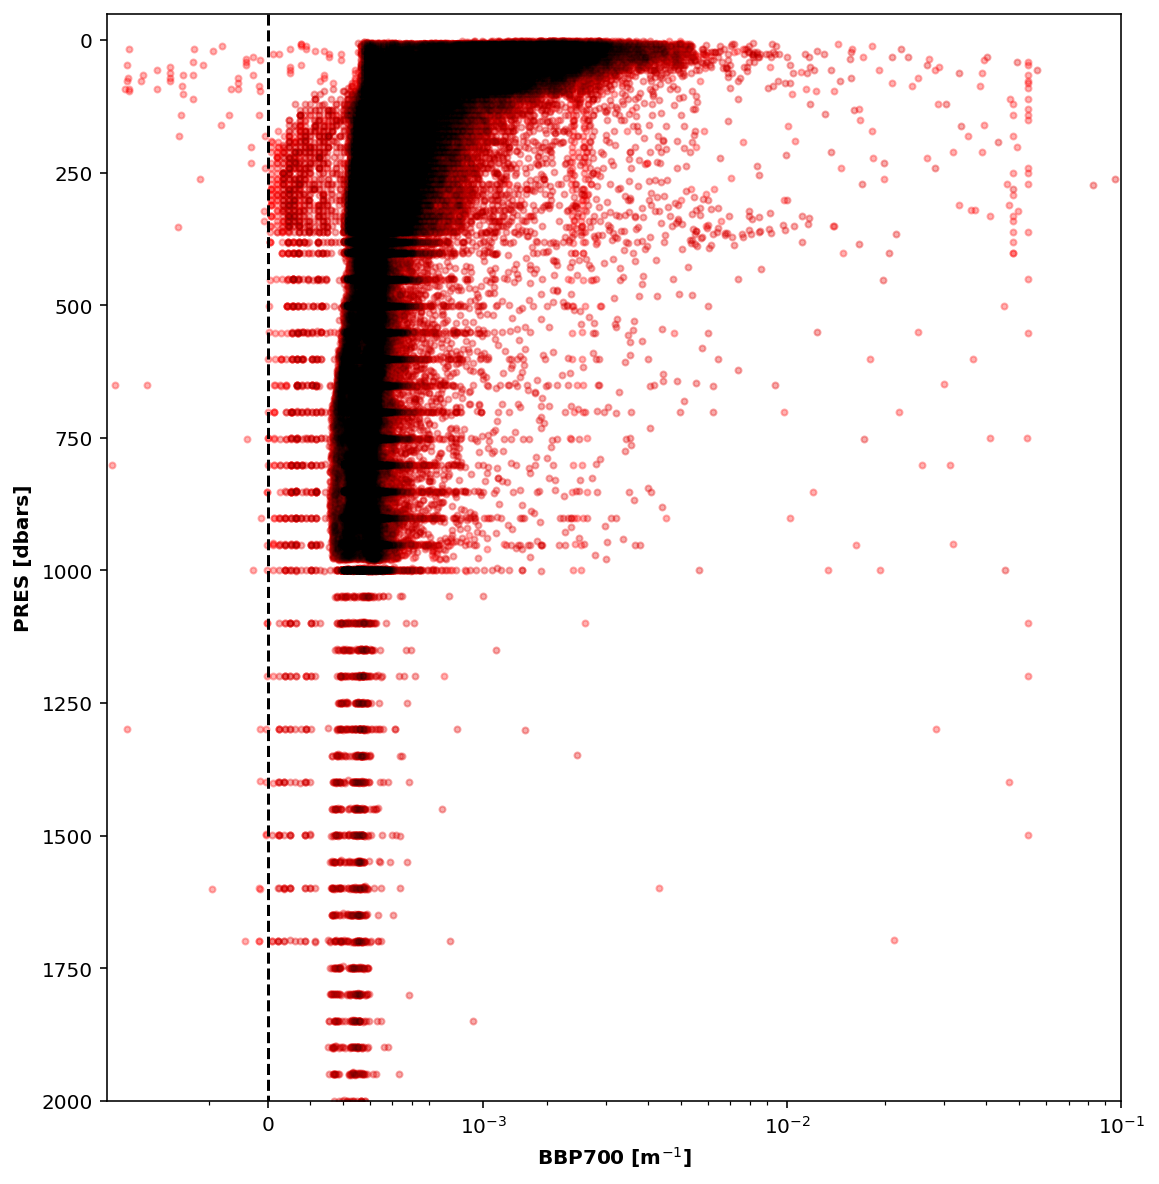

In [19]:
# %matplotlib widget
iN = 1#int(iall.size/3.) # step size to make plotting faster
fig = plt.figure(figsize=(20,10))
xmin = 0.0001
xmax = 0.1
xoff = 0.0003
ax1 = fig.add_subplot(1,2,1)
ax1.plot(all_BBP700[:][::iN] + xoff, all_PRES[:][::iN], 'ro', ms=3, mfc='r', alpha=0.3)
ax1.plot(all_BBP700[iQCle2][::iN] + xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.03)
ax1.plot((xoff, xoff), (-50, 2000), 'k--')
ax1.set_ylim([-50, 2000])
# ax1.set_xlim([-0.0003, 0.1])
ax1.set_xlim([xmin, xmax])
ax1.invert_yaxis()
ax1.set_xscale('log')
ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
ax1.set_ylabel('PRES [dbars]', fontweight='bold')
xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1])+xoff)
xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
plt.xticks(xts, xtklbls)
plt.rcParams.update({'font.size': 20})


gc.collect()
    

In [20]:
def plot_iQC(x1, x2, y1, y2, test):


    # %matplotlib widget
    fig = plt.figure(figsize=(20,10))
    xmin = 0.0001
    xmax = 0.1
    xoff = 0.0003
    ax1 = fig.add_subplot(1,2,1)

    ax1.plot(x1 + xoff, y1, 'o', ms=3, alpha=0.03, color='b')
    ax1.plot(x2 + xoff, y2, 'ro', ms=3, alpha=0.4)

    ax1.plot((xoff, xoff), (-50, 2000), 'k--')

    ax1.set_ylim([-50, 2000])
    # ax1.set_xlim([-0.0003, 0.1])
    ax1.set_xlim([xmin, xmax])
    ax1.invert_yaxis()
    ax1.set_xscale('log')
    ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
    ax1.set_ylabel('PRES [dbars]', fontweight='bold')
    xts = list(np.asarray([0, 1e-3, 1e-2, 1e-1]) + xoff)
    xtklbls = ('0',  '10'+'$^{-3}$', '10'+'$^{-2}$', '10'+'$^{-1}$')
    plt.xticks(xts, xtklbls)
    plt.rcParams.update({'font.size': 20})
    plt.title(test)
    gc.collect()


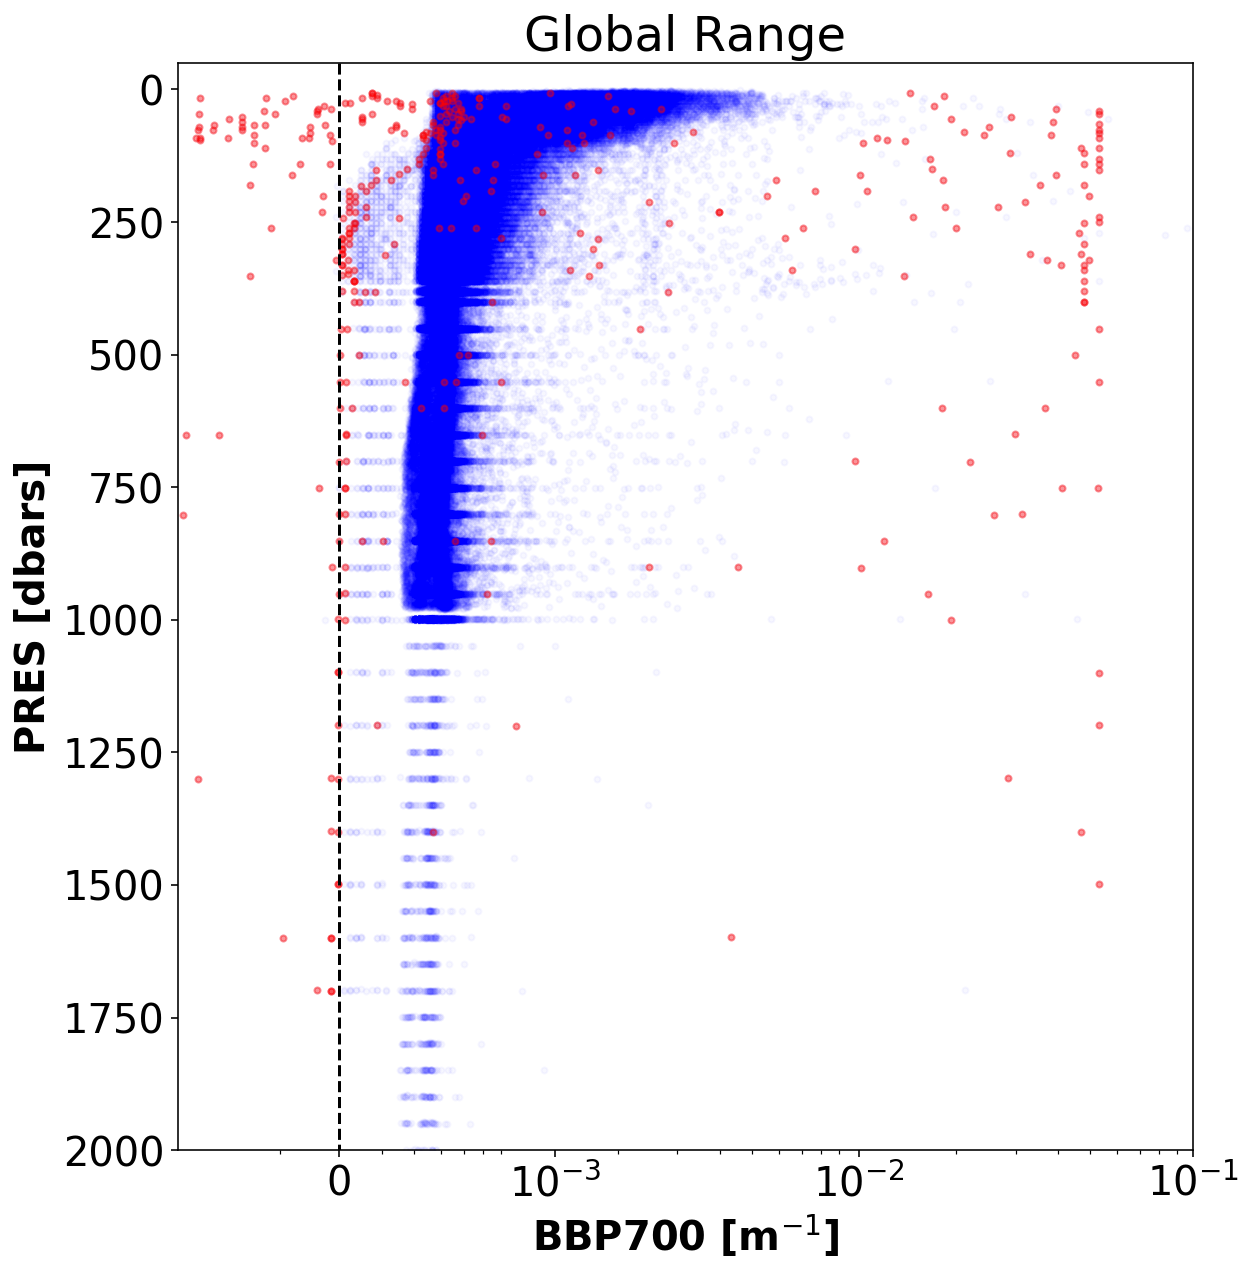

In [21]:
# plots results for Global range test (A)
iN = 1
x1 = all_BBP700[:][::iN]
x2 = all_BBP700[iQCge3][iA][::]
y1 = all_PRES[:][::iN]
y2 = all_PRES[iQCge3][iA][::]
plot_iQC(x1, x2, y1, y2, tests['A'])

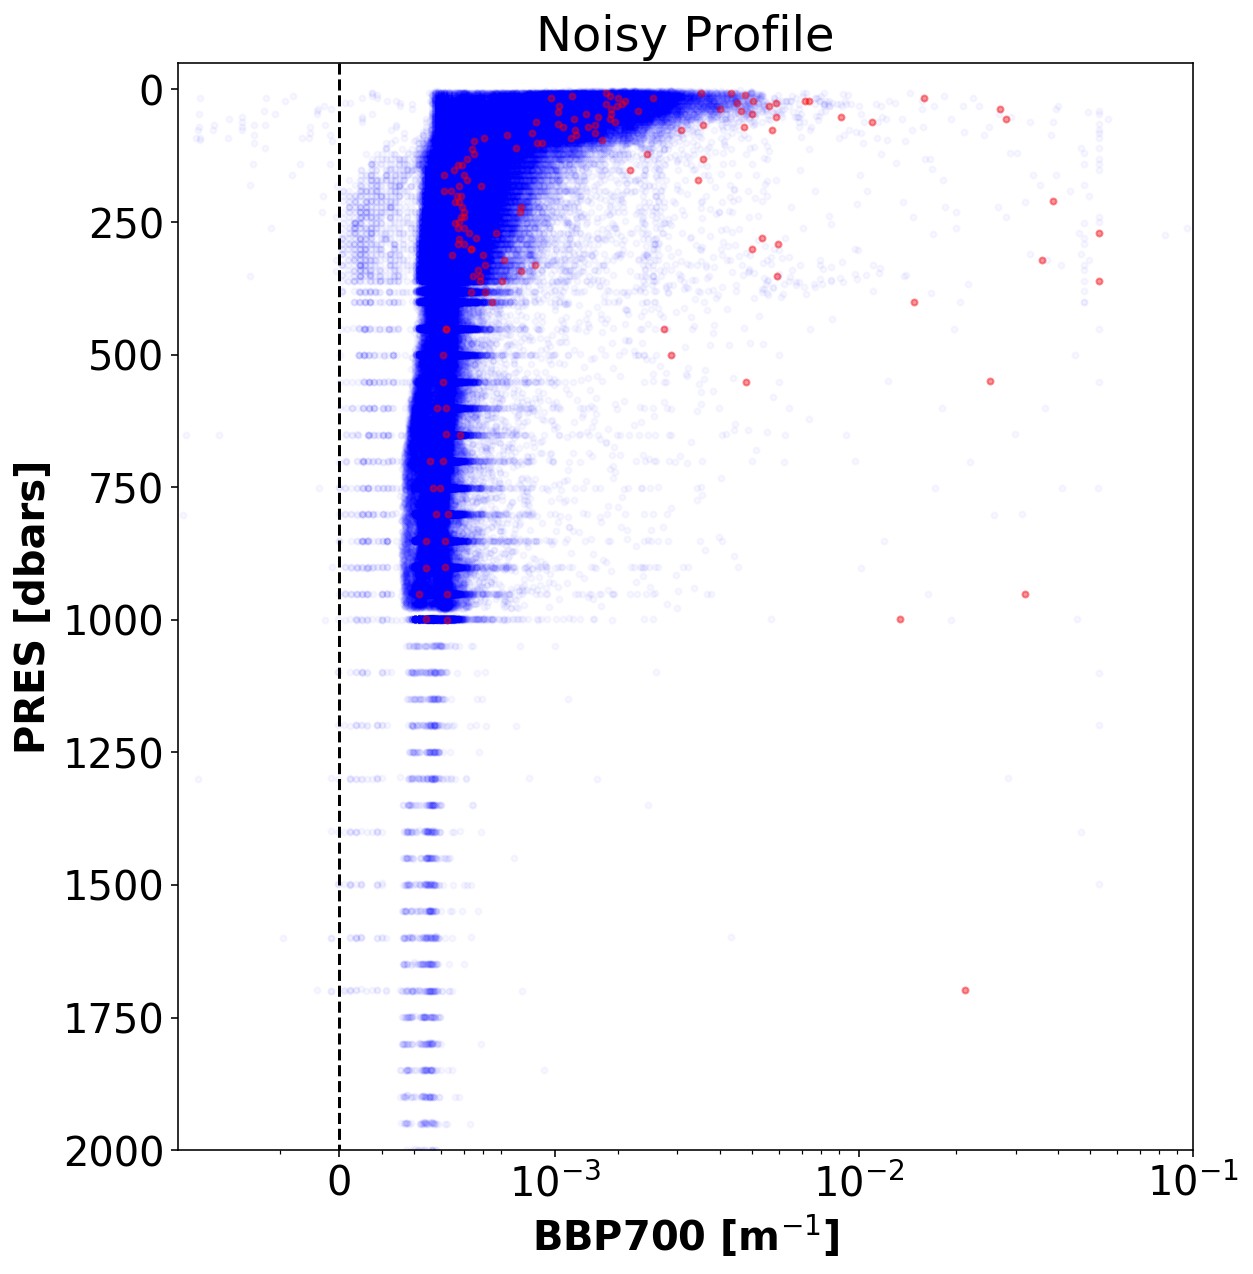

In [22]:
# plots results for test (B)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iB][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iB][::]
plot_iQC(x1, x2, y1, y2, tests['B'])

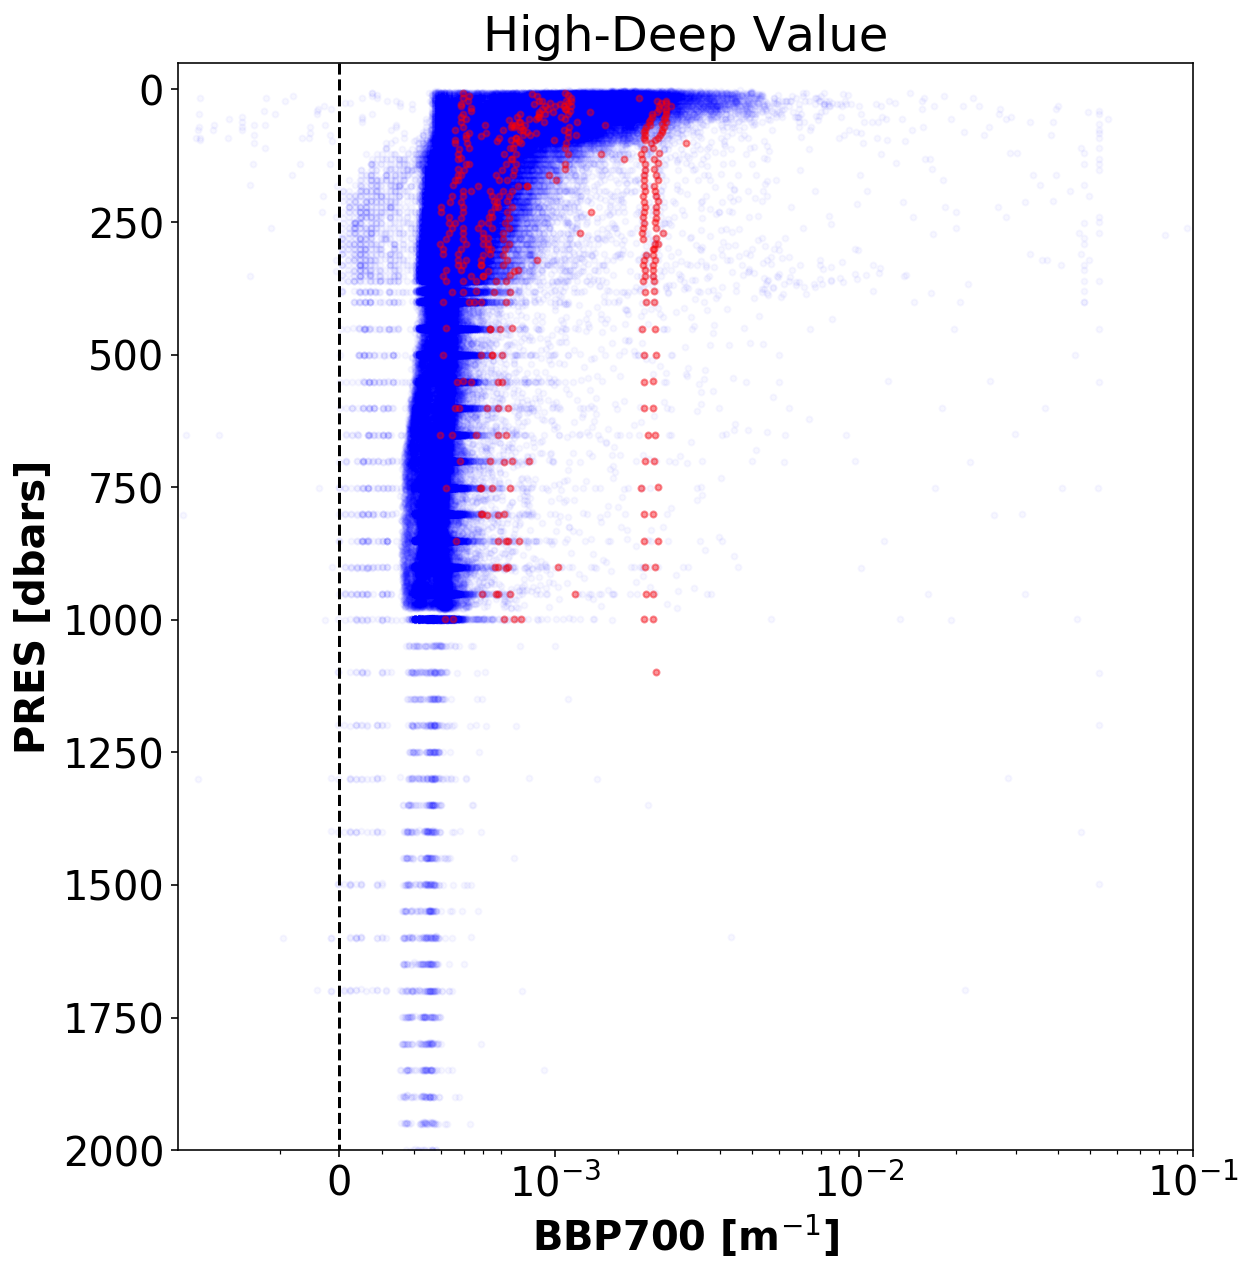

In [23]:
# plots results for test (C)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iC][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iC][::]
plot_iQC(x1, x2, y1, y2, tests['C'])

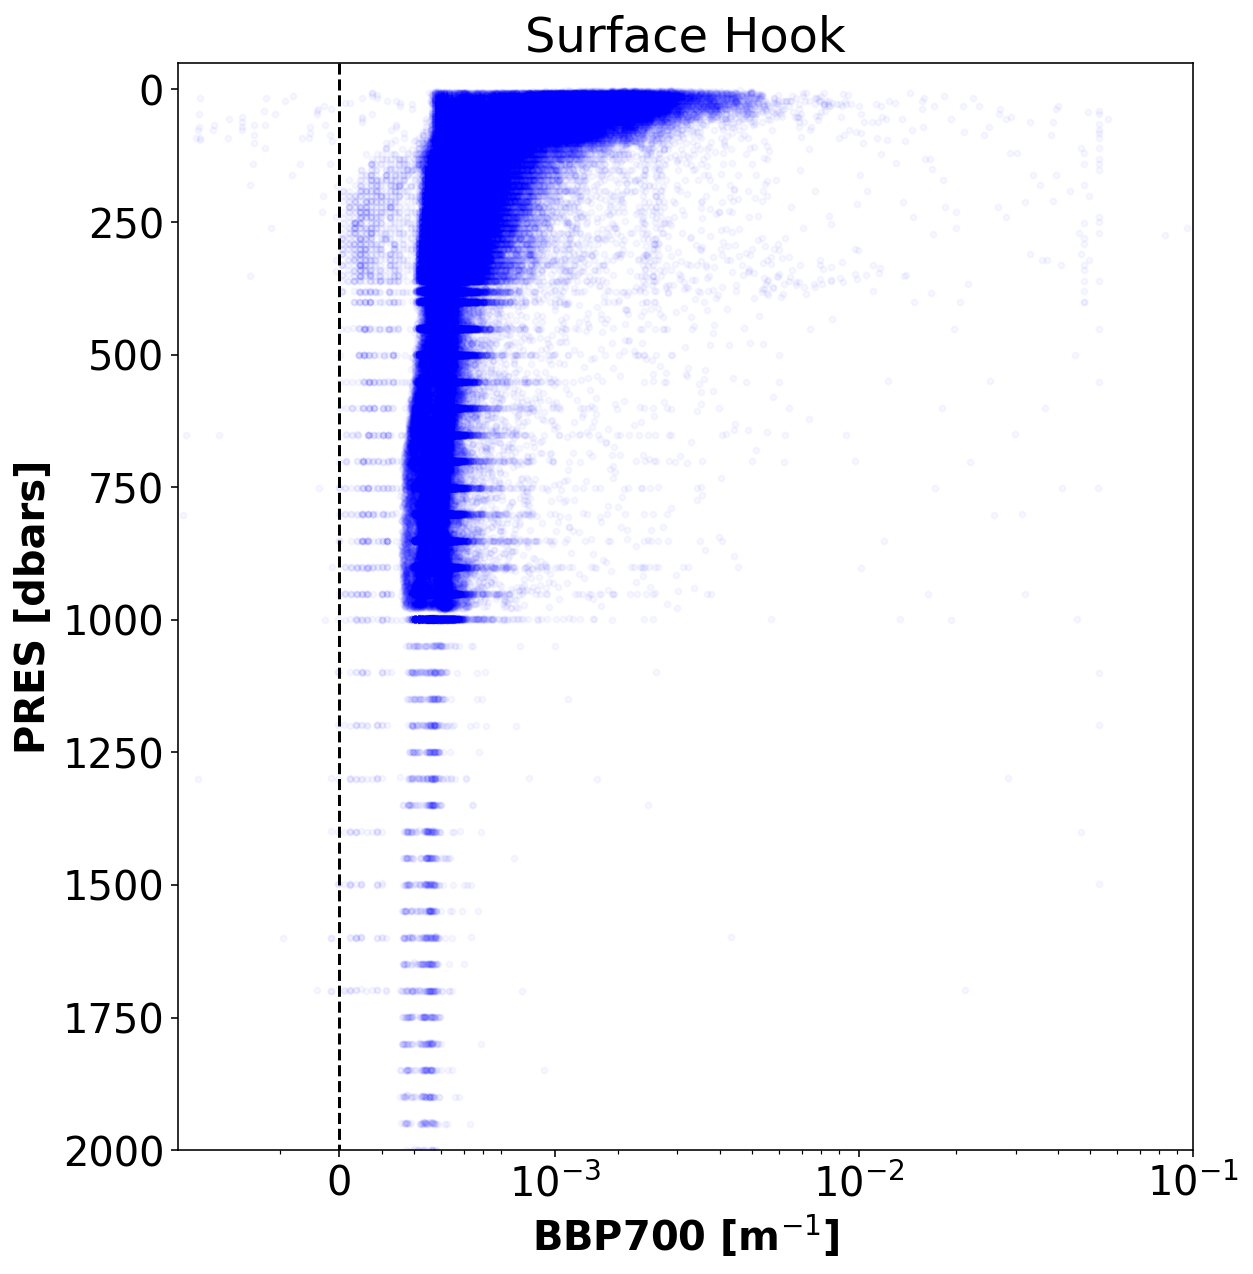

In [24]:
# plots results for test (D)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iD][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iD][::]
plot_iQC(x1, x2, y1, y2, tests['D'])

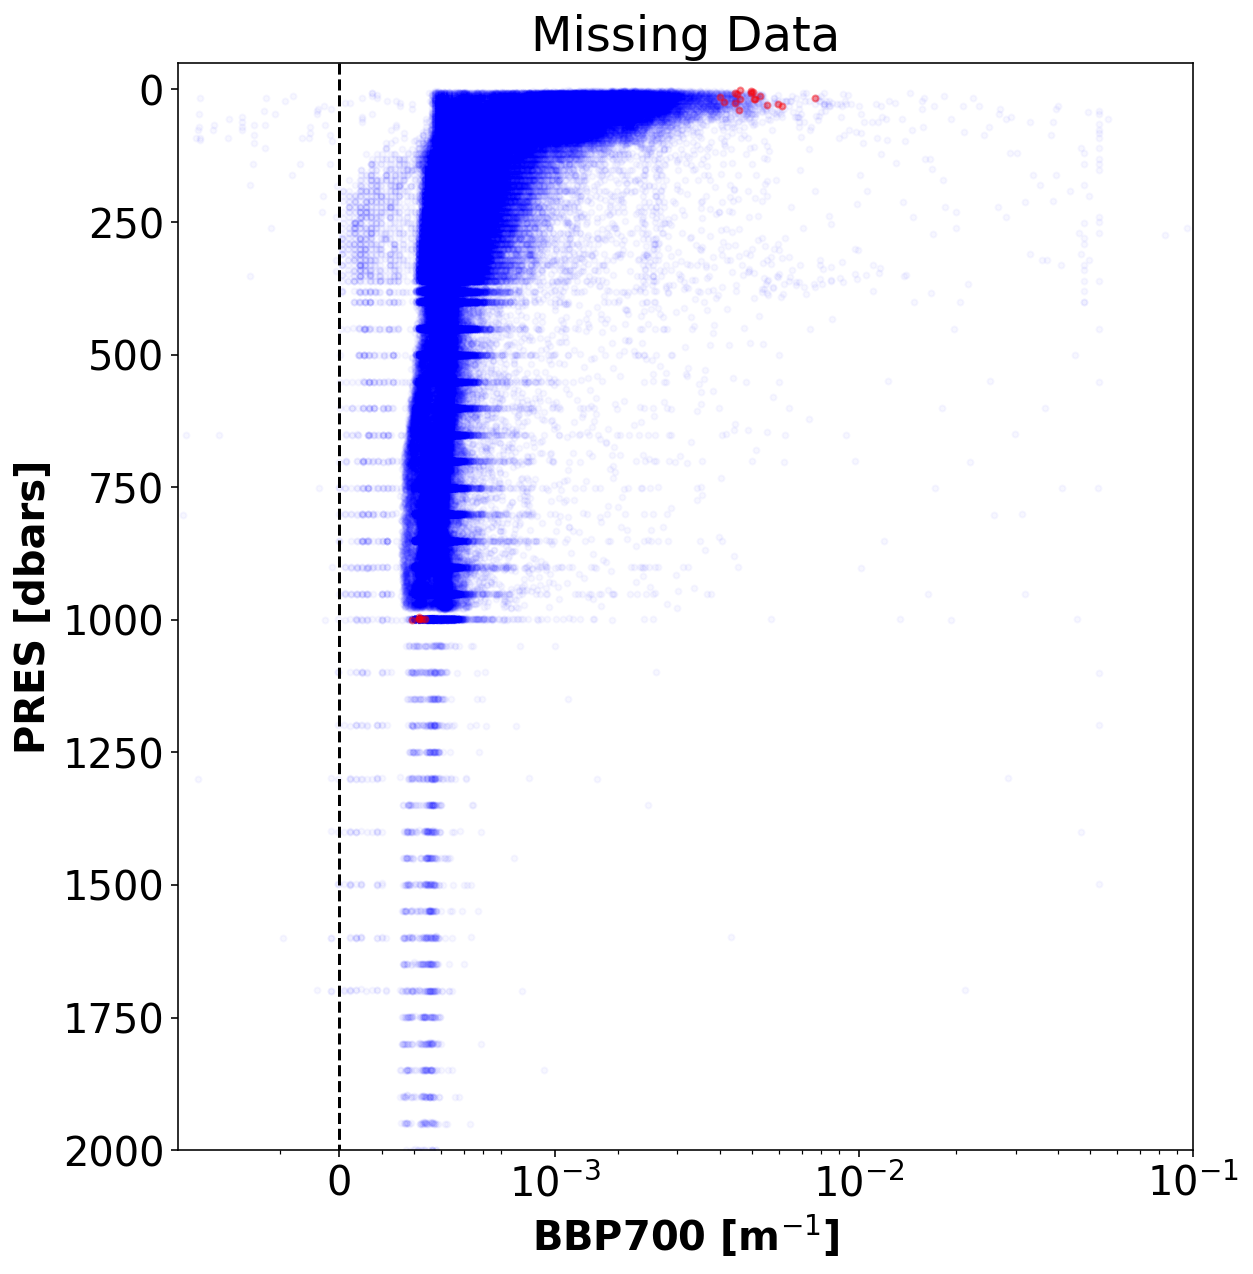

In [25]:
# plots results for test (E)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iE][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iE][::]
plot_iQC(x1, x2, y1, y2, tests['E'])

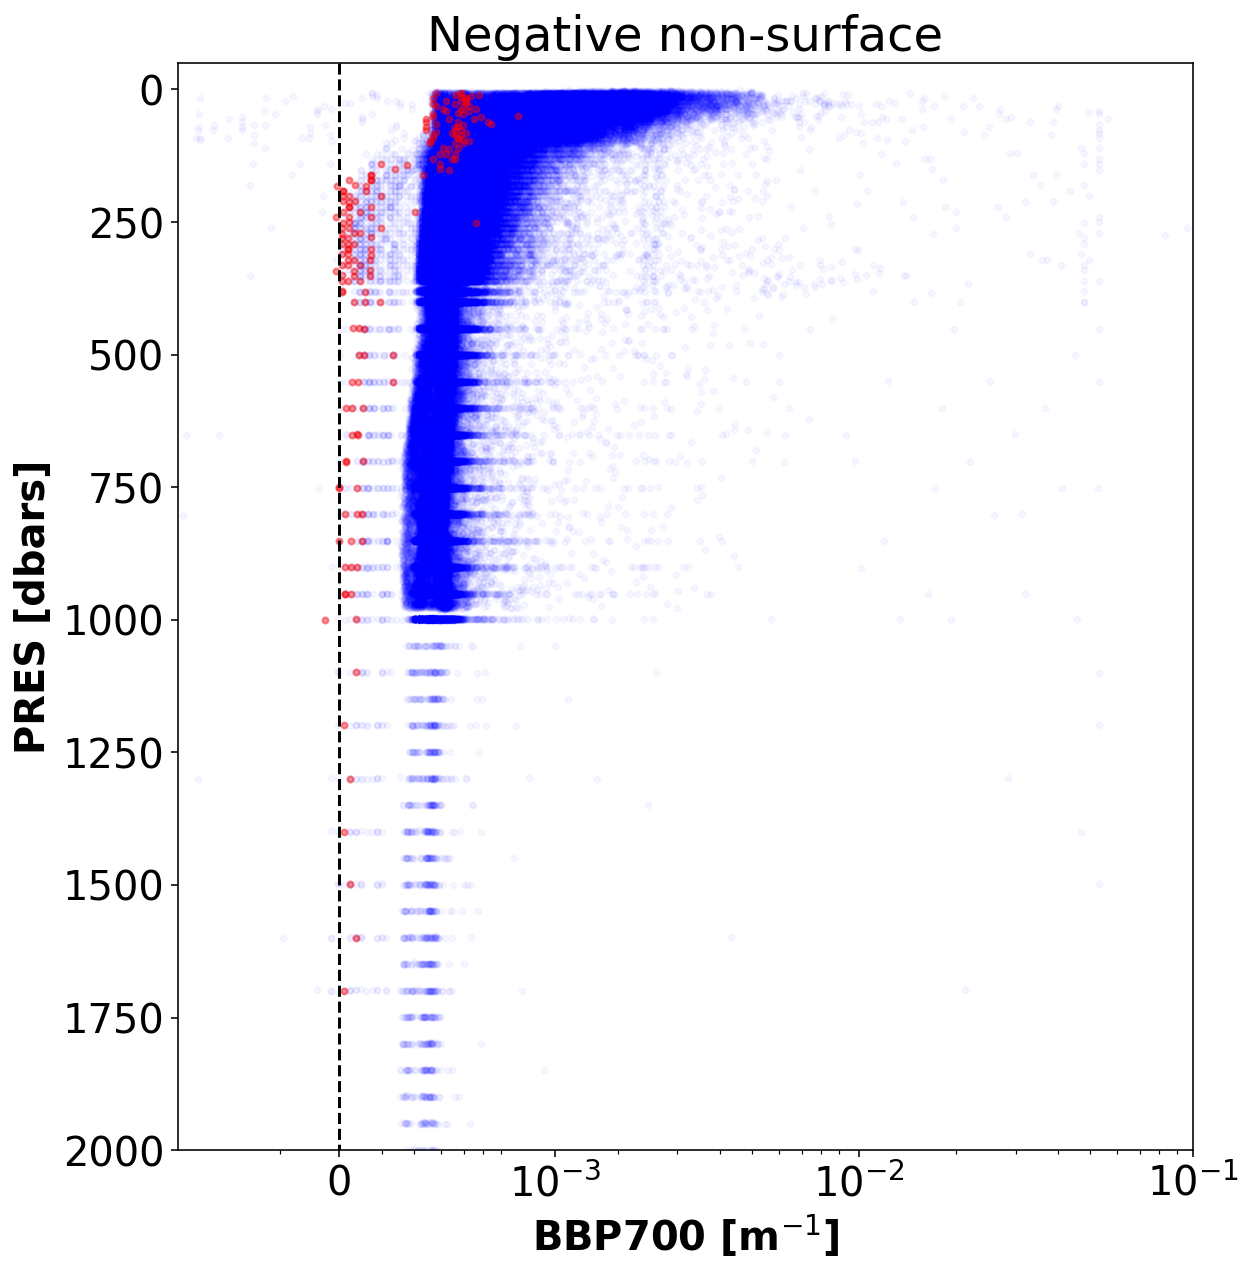

In [26]:
# plots results for test (F)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iF][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iF][::]
plot_iQC(x1, x2, y1, y2, tests['F'])

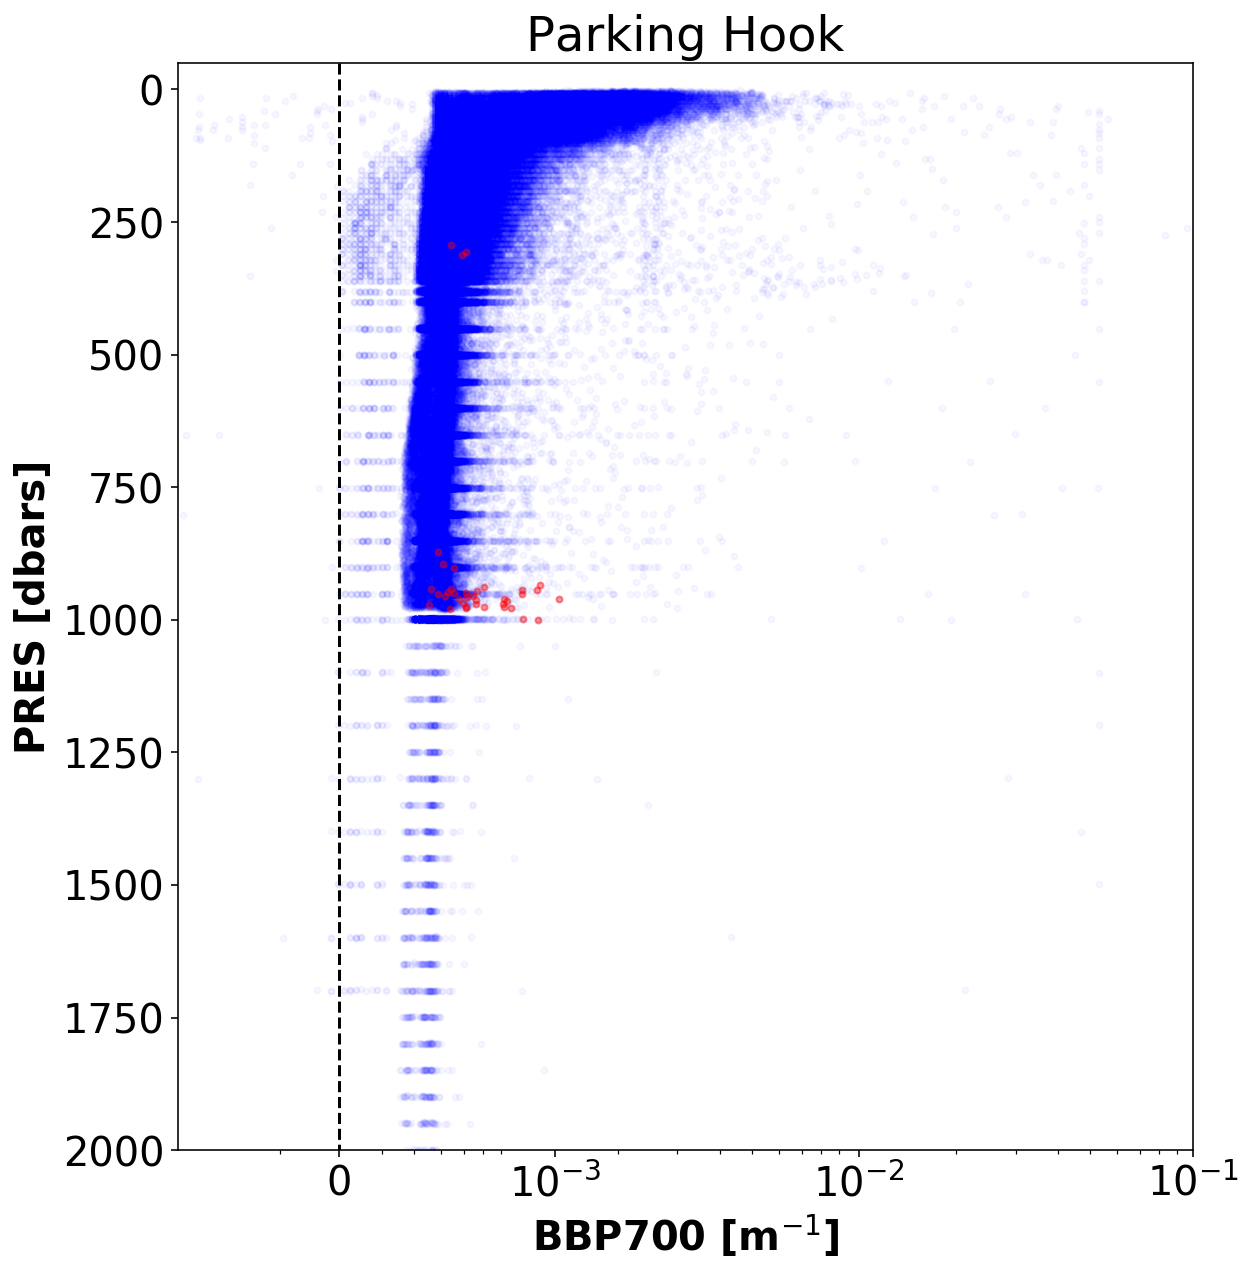

In [27]:
# plots results for test (G)
# x1 = np.array(all_BBP700)[:][::iN]
x2 = all_BBP700[iQCge3][iG][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iG][::]
plot_iQC(x1, x2, y1, y2, tests['G'])

[-43.114, 13.21]
[1.8633982066174395, 2.3567661476357222]


array(['aoml/5903612'], dtype='<U12')

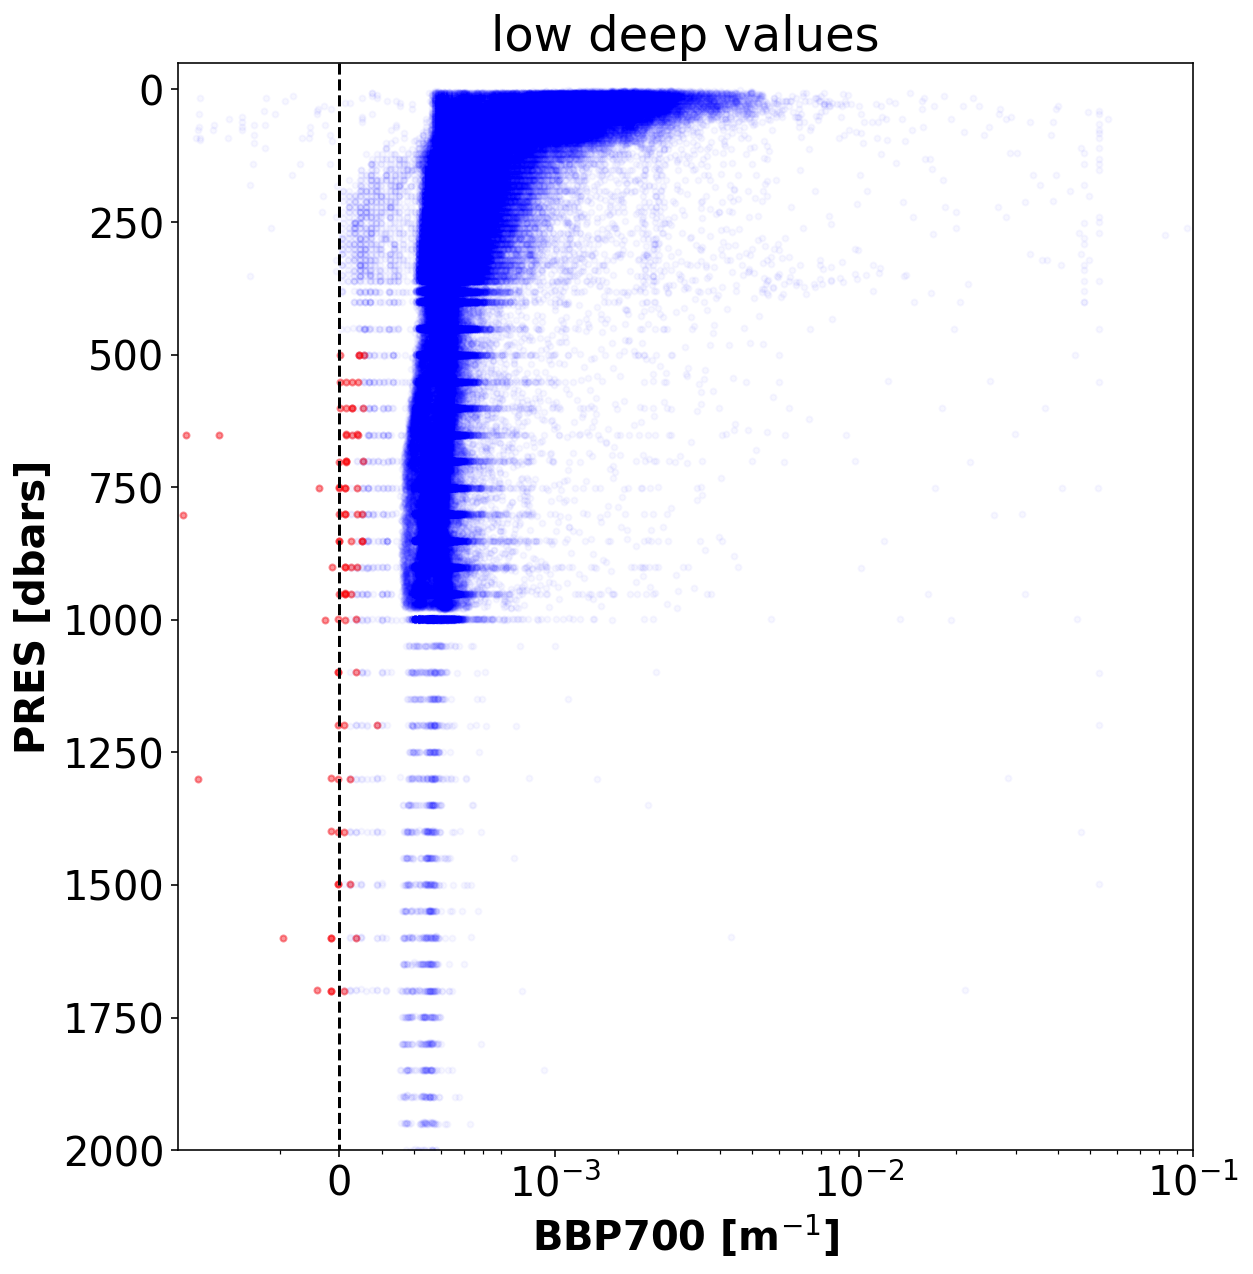

In [40]:
# plots results for test (G)
# x1 = np.array(all_BBP700)[:][::iN]
iH = np.where((all_BBP700[iQCge3]<1e-4) & (all_PRES[iQCge3]>500)  )[0] # global range

x2 = all_BBP700[iQCge3][iH][::]
# y1 = np.array(all_PRES)[:][::iN]
y2 = all_PRES[iQCge3][iH][::]
plot_iQC(x1, x2, y1, y2, 'low deep values')

print([np.median(all_LAT[iQCge3][iH]), np.median(all_LON[iQCge3][iH])])
print([np.std(all_LAT[iQCge3][iH]), np.std(all_LON[iQCge3][iH])])
np.unique(all_WMO[iQCge3][iH])

12654

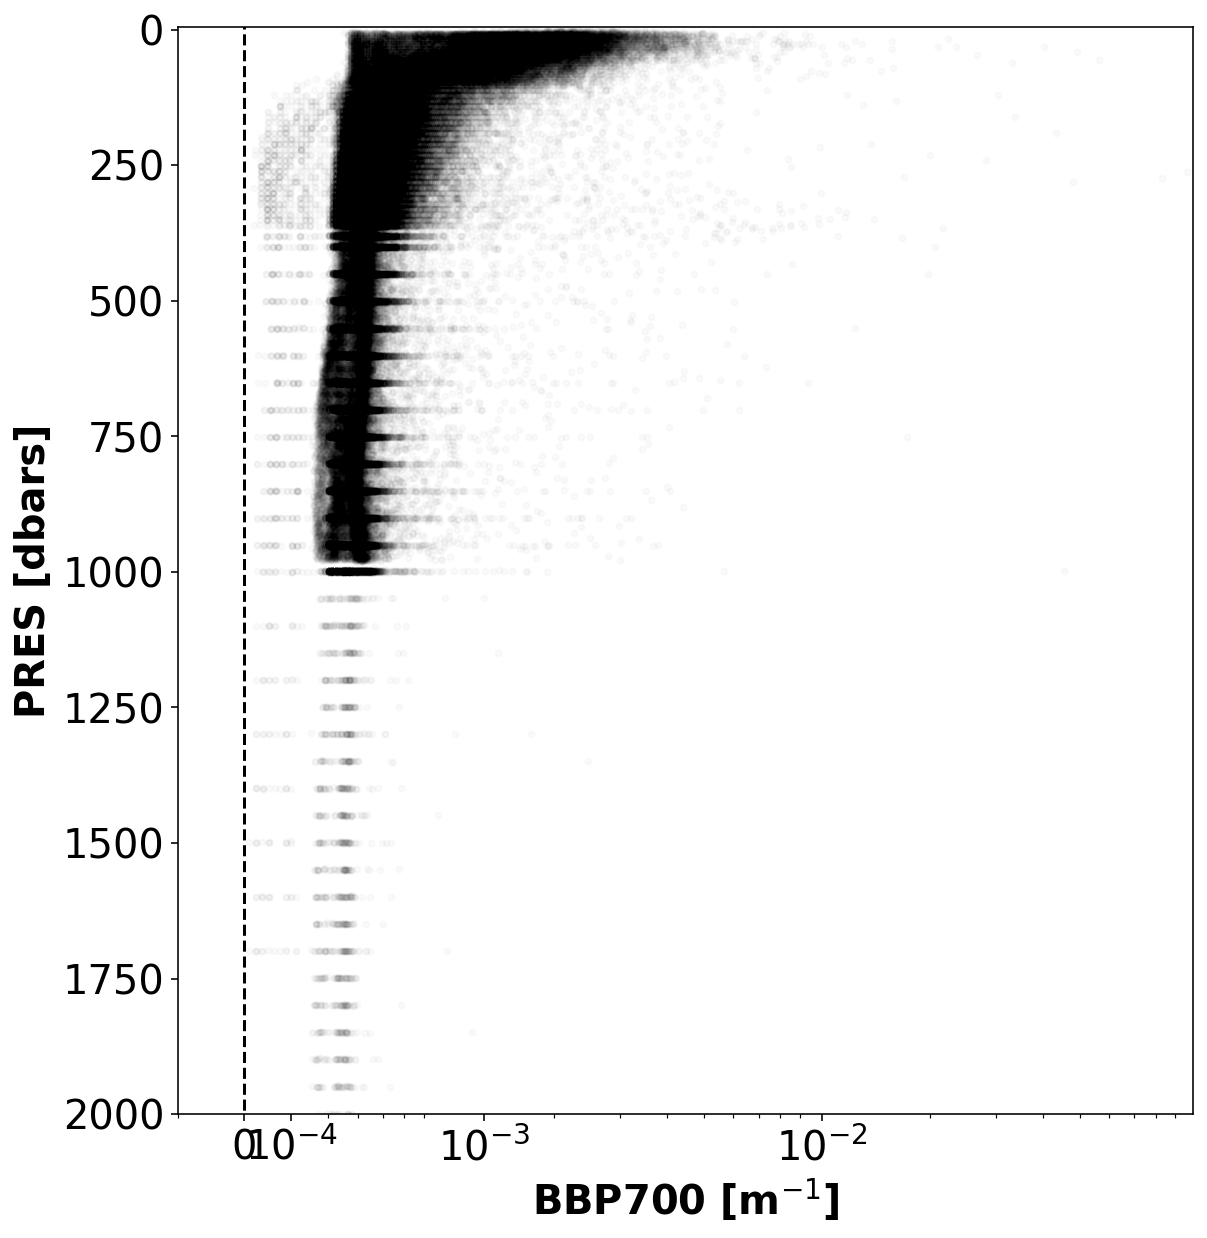

In [28]:
# %matplotlib widget
iN = 1#int(iall.size/3.) # step size to make plotting faster
fig = plt.figure(figsize=(20,10))
xmin = 0.0002
xmax = 0.1
xoff = 0.0003
ax1 = fig.add_subplot(1,2,1)
ax1.plot(all_BBP700[iQCle2][::iN]+xoff, all_PRES[iQCle2][::iN], 'ko', ms=3, alpha=0.02)
ax1.plot((xoff, xoff), (-50, 2000), 'k--')
ax1.set_ylim([-5, 2000])

ax1.set_xlim([xmin, xmax])
ax1.invert_yaxis()
ax1.set_xscale('log')
ax1.set_xlabel('BBP700 [m'+'$^{-1}$'+']', fontweight='bold')
ax1.set_ylabel('PRES [dbars]', fontweight='bold')
xts = list(np.asarray([0, 1e-4, 1e-3, 1e-2]) + xoff)
xtklbls = ('0',  '10'+'$^{-4}$', '10'+'$^{-3}$', '10'+'$^{-2}$')
plt.xticks(xts, xtklbls)
plt.rcParams.update({'font.size': 20})


gc.collect()
    

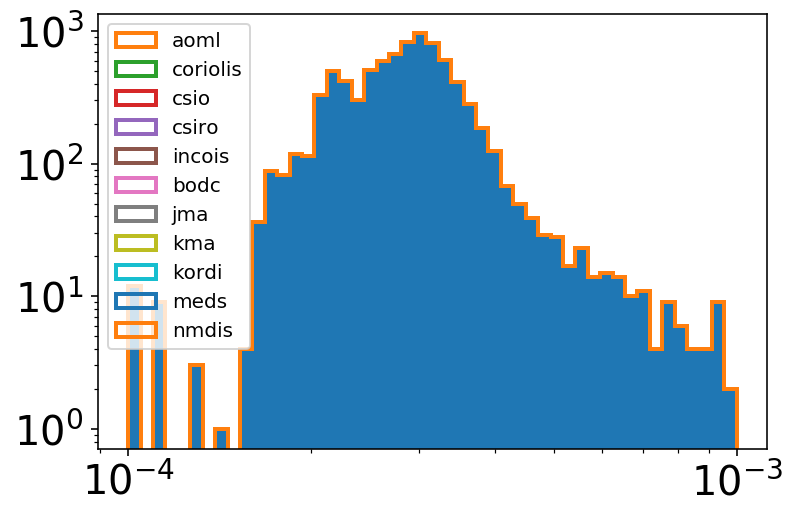

In [29]:
iLT1000 = np.where((all_PRES[iQCle2]<=1000) & (all_PRES[iQCle2]>=900))
plt.hist(all_BBP700[iQCle2][iLT1000], bins=np.logspace(-4,-3, 50));

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iLT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iLT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)


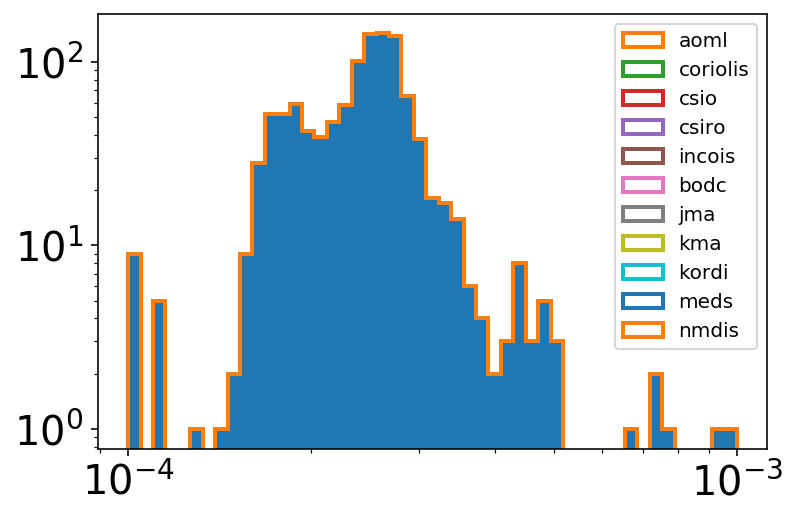

In [30]:

iGT1000 = np.where((all_PRES[iQCle2]>=1000))
plt.hist(all_BBP700[iQCle2][iGT1000], bins=np.logspace(-4,-3, 50));
# plt.gca().set_xticklabels([1e-4, 2e-4, 4e-4, 6e-4, 8e-4, 10e-4], fontsize=20)

dacs = ['aoml', 'coriolis', 'csio', 'csiro', 'incois', 'bodc', 'jma', 'kma', 'kordi', 'meds', 'nmdis']
for idac in dacs:
#     print(idac)
    iDAC = np.where(pd.Series(all_WMO[iQCle2][iGT1000]).str.contains(idac).values)[0]
    plt.hist(all_BBP700[iQCle2][iGT1000][iDAC], bins=np.logspace(-4,-3, 50), histtype='step', label=idac, lw=2);
plt.legend(fontsize=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.ylim(1e2, 1e5)